In [5]:
import Drone
from configurations import defaultConfig 
import numpy as np
from plottingFunctions import state_plots, est_plots
import importlib
import matplotlib as mpl
import matplotlib.pyplot as plt


## Testing occupency grid generation
Significantly increase the number of obstacles to check that they are being registered correctly

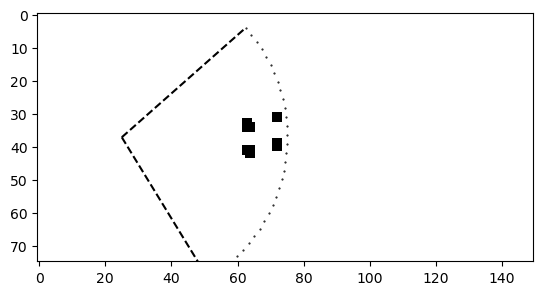

In [16]:
importlib.reload(Drone)

config = defaultConfig()
config.numObstacles = 25
drone = Drone.Drone(config, config)

thrustCommand = 4.4
fpaCommand = 0/180*np.pi
dynRef = drone.coherentCommand(thrustCommand,fpaCommand)
elivatorRef = drone.elevatorFromAlpha(dynRef[1]-dynRef[3])
stateRef = np.hstack(([0,50], dynRef))
action = (thrustCommand, elivatorRef, dynRef)
drone.reset(stateRef)

observation, grid, reward, terminated = drone.step(action)


# random data
fig, ax = plt.subplots()

# define the colors
cmap = mpl.colors.ListedColormap(['w', 'k'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
x = drone.ogOrigin[0]
z = drone.ogOrigin[1]
theta = drone.plant.state[3]
beam = drone.lidar_range
angle = drone.lidar_angle
res = drone.lidar_res
ax.plot([x,x+beam*np.cos(theta+angle/2)],[z,z+beam*np.sin(theta+angle/2)],'k--')
ax.plot([x,x+beam*np.cos(theta-angle/2)],[z,z+beam*np.sin(theta-angle/2)],'k--')
a = np.linspace(-angle/2,angle/2,int(res/3))
xs = x+beam*np.cos(theta+a)
zs = z+beam*np.sin(theta+a)
ax.plot(xs,zs,'k.',markersize=1)

ax.imshow(grid, interpolation='none', cmap=cmap, norm=norm)
ax.set_xlabel("Downrange distance (m)")
ax.set_ylabel("Downrange distance (m)")

